#Inflación subyacente

La **inflación subyacente** (*core inflation*) es la inflación que se desprende del Índice de Precios al Consumo (IPC) sin tener en cuenta para su cálculo ni los alimentos no elaborados ni los productos energéticos. Así, se eliminan aquellos componentes que son considerados más volátiles (es decir, se ven afectados por grandes fluctuaciones porque son sensibles a las circunstancias geopolíticas, como guerras, o a la temporalidad, como los vegetales, por ejemplo).

Por tanto, podría decirse que la inflación subyacente es un indicador que muestra, a corto plazo, la variabilidad de consumo de manera más precisa que la inflación general.

Conocer la inflación subyacente es útil, por ejemplo, en materia de política monetaria. La gestión de la autoridad monetaria será buena o mala en la medida en la que la inflación subyacente muestre estabilidad o no, independientemente de que el índice general muestre volatilidad. 


Vamos ahora a analizar la evolución con datos reales del IPC de España (INE) tanto la inflación general como la subyacente, así como la inflación de los productos energéticos y alimentos no elaborados, para ver así las fluctuaciones que presenta cada uno.

##Librerías

Cargamos las librerías que vamos a necesitar tanto para cargar el dataset como para desarrollar los gráficos.

In [53]:
import numpy as np
import pandas as pd
#importamos el paquete que nos permitirá desarrollar el gráfico
import matplotlib.pyplot as plt
from matplotlib import pyplot
#!pip install openpyxl --upgrade openpyxl #por si hubiera problemas y nos pide cargar una versión más actual

##Datos

In [54]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
dataset = 'inflacion_subyacente.xlsx'
serie = pd.read_excel(dataset, sheet_name='Datos', header = 0)

print (serie)

Saving inflacion_subyacente.xlsx to inflacion_subyacente.xlsx
                            nombre      año  valor_indice
0                   indice general  2002M01           3.1
1                   indice general  2002M02           3.1
2                   indice general  2002M03           3.1
3                   indice general  2002M04           3.6
4                   indice general  2002M05           3.6
..                             ...      ...           ...
715  no elaborados mas energeticos  2021M08          13.9
716  no elaborados mas energeticos  2021M09          16.3
717  no elaborados mas energeticos  2021M10          21.6
718  no elaborados mas energeticos  2021M11          21.1
719  no elaborados mas energeticos  2021M12          24.7

[720 rows x 3 columns]


In [55]:
#indexamos varibale para poder luego seleccionar los distintos índices separadamente
datos = serie.set_index('nombre')
datos

,año,valor_indice
nombre,,
indice general,2002M01,3.1
indice general,2002M02,3.1
indice general,2002M03,3.1
indice general,2002M04,3.6
indice general,2002M05,3.6
...,...,...
no elaborados mas energeticos,2021M08,13.9
no elaborados mas energeticos,2021M09,16.3
no elaborados mas energeticos,2021M10,21.6


##Gráficos

Una vez cargados los datos, se procede a realizar el gráfico en sí para observar la evolución de las distintas inflaciones consideradas.

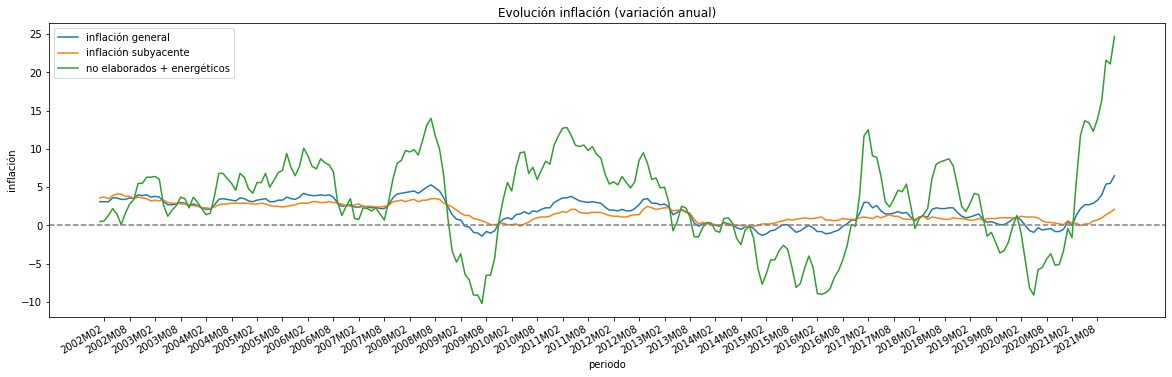

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))

# Especificar las líneas a incluir y su visualización
ax.plot(datos.año.loc[['indice general']], datos.valor_indice.loc[['indice general']], color='tab:blue', label='inflación general')
ax.plot(datos.año.loc[['indice subyacente']], datos.valor_indice.loc[['indice subyacente']], color='tab:orange', label='inflación subyacente')
ax.plot(datos.año.loc[['no elaborados mas energeticos']], datos.valor_indice.loc[['no elaborados mas energeticos']], color='tab:green', label='no elaborados + energéticos')

# cambiar características de los gráficos para visualizar mejor
plt.gcf().autofmt_xdate() #para que las fechas salgan inclinadas y no horizontal
plt.xticks(np.arange(1, 240, step= 6)) #para que no salgan todas las fechas juntas amontonadas (establece saltos entre fecha y fecha)
plt.axhline(y=0, color='grey', linestyle='--') #para poner la linea en el 0

# nombres
ax.set_xlabel('periodo')
ax.set_ylabel('inflación')
ax.set_title('Evolución inflación (variación anual)')
ax.legend(loc='upper left');

Como se puede observar, la inflación subyacente es mucho mas estable y constante que la inflación general pues esta última, al incorporar los alimentos no elaborados y los productos energéticos (que ya a simple vista se puede apreciar que son muy volátiles), absorve sus fluctuaciones y también las refleja.

Pero, una vez obtenido esto, puede surgir la pregunta de ¿cuál es el componente más volátil dentro de la inflación de los alimentos no elaborados y los productos energéticos? 

Procedemos ahora a analizarlo, tomando por separado la inflación de los alimentos no separados y la de los tres productos energéticos, a saber, la electricidad, el gas y el petróleo.

##Datos (2)

In [59]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
dataset = 'ipc_ipri.xlsx'
serie_1 = pd.read_excel(dataset, sheet_name='Datos', header = 0)

print (serie_1)

Saving ipc_ipri.xlsx to ipc_ipri.xlsx
                nombre      año  indice
0    ipri_electricidad  2018M01   -11.6
1    ipri_electricidad  2018M02     1.8
2    ipri_electricidad  2018M03     1.5
3    ipri_electricidad  2018M04     1.0
4    ipri_electricidad  2018M05     4.3
..                 ...      ...     ...
328      ipc_alimentos  2021M08     2.6
329      ipc_alimentos  2021M09     1.6
330      ipc_alimentos  2021M10     0.9
331      ipc_alimentos  2021M11     3.9
332      ipc_alimentos  2021M12     6.5

[333 rows x 3 columns]


In [60]:
#indexamos varibale para poder luego seleccionar los distintos índices separadamente
datos_1 = serie_1.set_index('nombre')
datos_1

,año,indice
nombre,,
ipri_electricidad,2018M01,-11.6
ipri_electricidad,2018M02,1.8
ipri_electricidad,2018M03,1.5
ipri_electricidad,2018M04,1.0
ipri_electricidad,2018M05,4.3
...,...,...
ipc_alimentos,2021M08,2.6
ipc_alimentos,2021M09,1.6
ipc_alimentos,2021M10,0.9


##Gráfico (2)

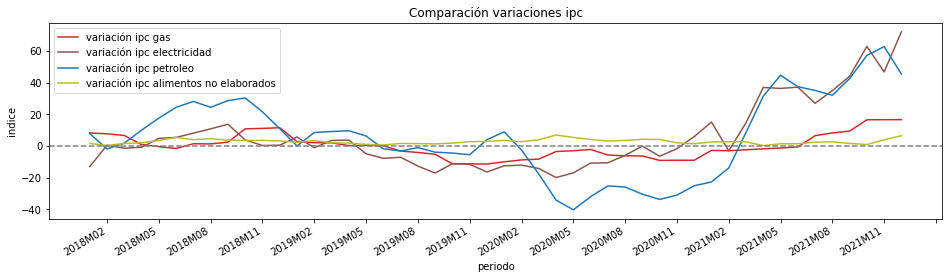

In [61]:
fig, ax = plt.subplots(figsize=(16, 4))

# Especificar las líneas a incluir y su visualización
ax.plot(datos_1.año.loc[['ipc_gas']], datos_1.indice.loc[['ipc_gas']], color='tab:red', label='variación ipc gas')
ax.plot(datos_1.año.loc[['ipc_electricidad']], datos_1.indice.loc[['ipc_electricidad']], color='tab:brown', label='variación ipc electricidad')
ax.plot(datos_1.año.loc[['ipc_petroleo']], datos_1.indice.loc[['ipc_petroleo']], color='tab:blue', label='variación ipc petroleo')
ax.plot(datos_1.año.loc[['ipc_alimentos']], datos_1.indice.loc[['ipc_alimentos']], color='tab:olive', label='variación ipc alimentos no elaborados')

plt.gcf().autofmt_xdate() 
plt.xticks(np.arange(1, 50, step= 3)) 
plt.axhline(y=0, color='grey', linestyle='--') 

# nombres
ax.set_xlabel('periodo')
ax.set_ylabel('indice')
ax.set_title('Comparación variaciones ipc')
ax.legend(loc='upper left');

Como vemos, a lo largo de los años, el componente que parece más estable parece ser los alimentos no elaborados seguido del gas, mientras que el que más variaciones parece presentar es el petróleo. Tanto este como la electricidad se ven claramente que han subido de una manera exponencial en a partir del año 2021, coincidiendo con la crisis del covid, la falta de productos y los conflictos con Europa del este.


Por último, vamos a analizar, si estos grandes aumentos en los precios están acompañados de subida de precios industriales

##Gráfico (3)

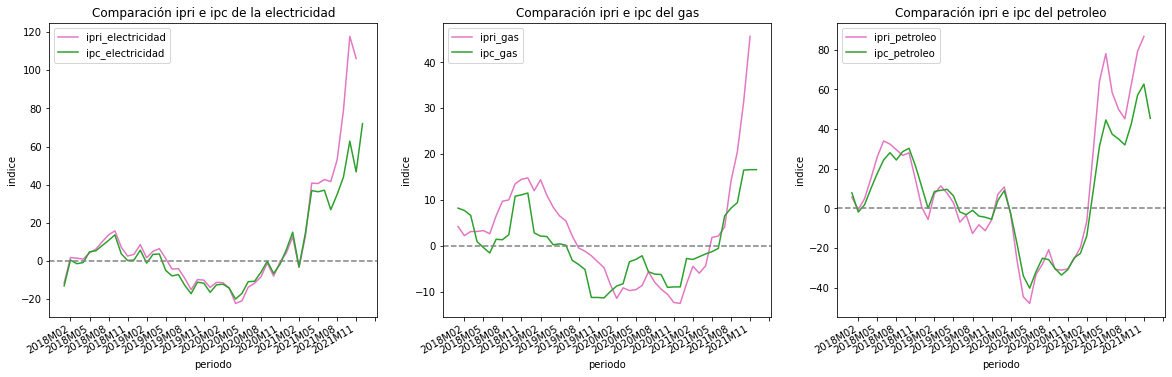

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 6))


# GRÁFICO 1
# determinar ejes x e y
ax1.plot(datos_1.año.loc[['ipri_electricidad']], datos_1.indice.loc[['ipri_electricidad']], color='tab:pink', label='ipri_electricidad')
ax1.plot(datos_1.año.loc[['ipc_electricidad']], datos_1.indice.loc[['ipc_electricidad']], color='tab:green', label='ipc_electricidad')

# nombres 
ax1.set_xlabel('periodo')
ax1.set_ylabel('indice')
ax1.set_title('Comparación ipri e ipc de la electricidad')
ax1.legend(loc='upper left')

# cambiar características de los gráficos para visualizar mejor
ax1.set_xticks(np.arange(1, 50, step= 3))
ax1.axhline(y=0, color='grey', linestyle='--')

# GRÁFICO 2
ax2.plot(datos_1.año.loc[['ipri_gas']], datos_1.indice.loc[['ipri_gas']], color='tab:pink', label='ipri_gas')
ax2.plot(datos_1.año.loc[['ipc_gas']], datos_1.indice.loc[['ipc_gas']], color='tab:green', label='ipc_gas')

ax2.set_xlabel('periodo')
ax2.set_ylabel('indice')
ax2.set_title('Comparación ipri e ipc del gas')
ax2.legend(loc='upper left')

ax2.set_xticks(np.arange(1, 50, step= 3))
ax2.axhline(y=0, color='grey', linestyle='--')


# GRÁFICO 3
ax3.plot(datos_1.año.loc[['ipri_petroleo']], datos_1.indice.loc[['ipri_petroleo']], color='tab:pink', label='ipri_petroleo')
ax3.plot(datos_1.año.loc[['ipc_petroleo']], datos_1.indice.loc[['ipc_petroleo']], color='tab:green', label='ipc_petroleo')

ax3.set_xlabel('periodo')
ax3.set_ylabel('indice')
ax3.set_title('Comparación ipri e ipc del petroleo')
ax3.legend(loc='upper left')

ax3.set_xticks(np.arange(1, 50, step= 3))
ax3.axhline(y=0, color='grey', linestyle='--')

plt.gcf().autofmt_xdate();

Siguiendo los gráficos, en general, subidas en los precios de producción y subidas en los precios de consumo coinciden (para estos casos).

Ahora bien, en el caso del gas si que se observan mayores diferencias entre el ipri y el ipc, pareciendo que el indice de precios industriales para el gas es más volátil de lo que es el índice de precios al consumo.

In [ ]:
#PARA HACER UN GRÁFICO DE MATPLOTLIB INTERACTIVO (1)
!pip install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()


(1) https://towardsdatascience.com/how-to-produce-interactive-matplotlib-plots-in-jupyter-environment-1e4329d71651